# Exploring the Lorenz System of Differential Equations

In this Notebook we explore the Lorenz system of differential equations:

$$
\begin{aligned}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{aligned}
$$

This is one of the classic systems in non-linear differential equations. It exhibits a range of different behaviors as the parameters ($\sigma$, $\beta$, $\rho$) are varied.

## Imports

First, we import the needed things from IPython, NumPy, Matplotlib and SciPy.

In [1]:
%matplotlib inline

In [2]:
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

In [3]:
import numpy as np
from scipy import integrate

import matplotlib

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

## Computing the trajectories and plotting the result

We define a function that can integrate the differential equations numerically and then plot the solutions. This function has arguments that control the parameters of the differential equation ($\sigma$, $\beta$, $\rho$), the numerical integration (`N`, `max_time`) and the visualization (`angle`).

In [4]:
def solve_lorenz(N=10, angle=0.0, max_time=4.0, σ=10.0, β=8./3, ρ=28.0):

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('off')

    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))
    
    def lorenz_deriv(x_y_z, t0, σ=σ, β=β, ρ=ρ):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return (σ * (y - x), x * (ρ - z) - y, x * y - β * z)

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])
    
    # choose a different color for each trajectory
    colors = plt.cm.jet(np.linspace(0, 1, N))

    for i in range(N):
        x, y, z = x_t[i,:,:].T
        lines = ax.plot(x, y, z, '-', c=colors[i])
        plt.setp(lines, linewidth=2)

    ax.view_init(30, angle)
    plt.show()
    
    return t, x_t

Let's call the function once to view the solutions. For this set of parameters, we see the trajectories swirling around two points, called attractors. 

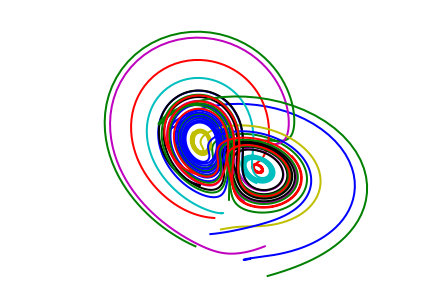

In [5]:
t, x_t = solve_lorenz(angle=0, N=10)

In [6]:
matplotlib.style.use('fivethirtyeight')

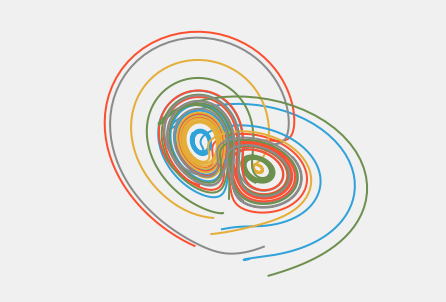

In [7]:
t, x_t = solve_lorenz(angle=0, N=10)

Using IPython's `interactive` function, we can explore how the trajectories behave as we change the various parameters.

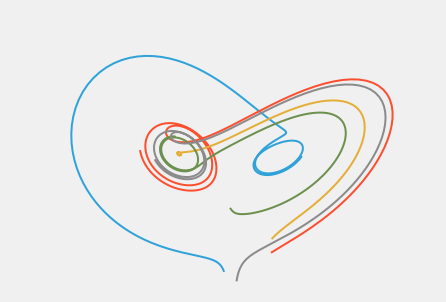

(array([ 0.        ,  0.00400943,  0.00801887,  0.0120283 ,  0.01603774,
         0.02004717,  0.0240566 ,  0.02806604,  0.03207547,  0.03608491,
         0.04009434,  0.04410377,  0.04811321,  0.05212264,  0.05613208,
         0.06014151,  0.06415094,  0.06816038,  0.07216981,  0.07617925,
         0.08018868,  0.08419811,  0.08820755,  0.09221698,  0.09622642,
         0.10023585,  0.10424528,  0.10825472,  0.11226415,  0.11627358,
         0.12028302,  0.12429245,  0.12830189,  0.13231132,  0.13632075,
         0.14033019,  0.14433962,  0.14834906,  0.15235849,  0.15636792,
         0.16037736,  0.16438679,  0.16839623,  0.17240566,  0.17641509,
         0.18042453,  0.18443396,  0.1884434 ,  0.19245283,  0.19646226,
         0.2004717 ,  0.20448113,  0.20849057,  0.2125    ,  0.21650943,
         0.22051887,  0.2245283 ,  0.22853774,  0.23254717,  0.2365566 ,
         0.24056604,  0.24457547,  0.24858491,  0.25259434,  0.25660377,
         0.26061321,  0.26462264,  0.26863208,  0.2

In [8]:
w = interactive(solve_lorenz, angle=(0.,360.), N=(0,50), σ=(0.0,50.0), ρ=(0.0,50.0))
display(w)

The object returned by `interactive` is a `Widget` object and it has attributes that contain the current result and arguments:

In [9]:
t, x_t = w.result

In [10]:
w.kwargs

{'N': 5, 'angle': 129.7, 'max_time': 1.7, 'β': 2.83333, 'ρ': 28.0, 'σ': 10.4}

After interacting with the system, we can take the result and perform further computations. In this case, we compute the average positions in $x$, $y$ and $z$.

In [11]:
xyz_avg = x_t.mean(axis=1)

In [12]:
xyz_avg.shape

(5, 3)

Creating histograms of the average positions (across different trajectories) show that on average the trajectories swirl about the attractors.

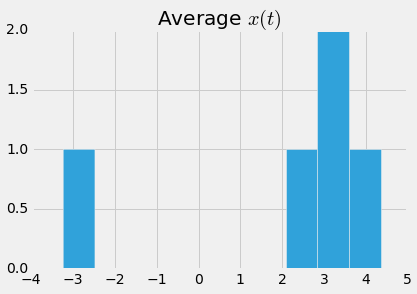

In [13]:
plt.hist(xyz_avg[:,0])
plt.title('Average $x(t)$')

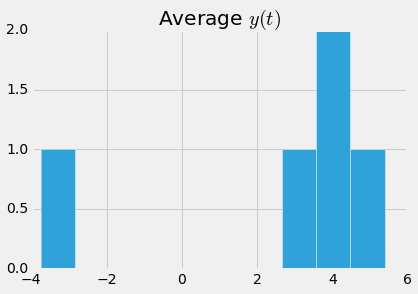

In [14]:
plt.hist(xyz_avg[:,1])
plt.title('Average $y(t)$')

##  Rich representations

In [15]:
from ipywidgets import interact
from IPython.display import display
from sympy import Symbol, Eq, factor, init_printing

In [16]:
init_printing(use_latex='mathjax')

In [17]:
x = Symbol('x')
def factorit(n):
    display(Eq(x**n-1, factor(x**n-1)))

In [18]:
interact(factorit, n=(2,40));

 12                       ⎛ 2    ⎞ ⎛ 2        ⎞ ⎛ 2        ⎞ ⎛ 4    2    ⎞
x   - 1 = (x - 1)⋅(x + 1)⋅⎝x  + 1⎠⋅⎝x  - x + 1⎠⋅⎝x  + x + 1⎠⋅⎝x  - x  + 1⎠

None